In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')

In [7]:
df = pd.read_csv('household_power_consumption.txt',delimiter=';',usecols=['Date','Time','Global_active_power'])

C:\Users\Oluwajuwon\AppData\Local\Temp\ipykernel_13276\956314545.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt',delimiter=';',usecols=['Date','Time','Global_active_power'])


In [8]:
df

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666
...,...,...,...
2075254,26/11/2010,20:58:00,0.946
2075255,26/11/2010,20:59:00,0.944
2075256,26/11/2010,21:00:00,0.938
2075257,26/11/2010,21:01:00,0.934


In [10]:
df.Global_active_power.value_counts()

?        25979
0.218     9491
0.216     9319
0.322     9226
0.324     9153
         ...  
9.116        1
9.160        1
7.340        1
3.772        1
3.74         1
Name: Global_active_power, Length: 6534, dtype: int64

In [11]:
df['datetime'] = df['Date']+ ' ' + df['Time']

In [12]:
df = df.drop(['Date','Time'],axis=1)

In [17]:
df = df.replace('?',np.nan)

In [22]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [33]:
df.Global_active_power = df.Global_active_power.astype('float')

In [23]:
df_uci = df.set_index('datetime')

In [27]:
df_uci

,Global_active_power
datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666
...,...
2010-11-26 20:58:00,0.946
2010-11-26 20:59:00,0.944
2010-11-26 21:00:00,0.938


In [34]:
df_uci.Global_active_power = df_uci.Global_active_power.astype('float')

In [43]:
df_uci_hourly = df_uci.resample('H').sum()

df_uci_hourly

,Global_active_power
datetime,
2006-12-16 17:00:00,152.024
2006-12-16 18:00:00,217.932
2006-12-16 19:00:00,204.014
2006-12-16 20:00:00,196.114
2006-12-16 21:00:00,183.388
...,...
2010-12-11 19:00:00,143.518
2010-12-11 20:00:00,105.200
2010-12-11 21:00:00,66.894


In [44]:
df_uci_hourly['hour'] = df_uci_hourly.index.hour
df_uci_hourly

,Global_active_power,hour
datetime,,
2006-12-16 17:00:00,152.024,17
2006-12-16 18:00:00,217.932,18
2006-12-16 19:00:00,204.014,19
2006-12-16 20:00:00,196.114,20
2006-12-16 21:00:00,183.388,21
...,...,...
2010-12-11 19:00:00,143.518,19
2010-12-11 20:00:00,105.200,20
2010-12-11 21:00:00,66.894,21


In [48]:
df_uci_hourly.index = df_uci_hourly.index.date

In [49]:
df_uci_hourly

,Global_active_power,hour
2006-12-16,152.024,17
2006-12-16,217.932,18
2006-12-16,204.014,19
2006-12-16,196.114,20
2006-12-16,183.388,21
...,...,...
2010-12-11,143.518,19
2010-12-11,105.200,20
2010-12-11,66.894,21
2010-12-11,19.232,22


In [51]:
df_hourly_pivot = df_uci_hourly.pivot(columns='hour')

In [52]:
df_hourly_pivot = df_hourly_pivot.dropna()

In [76]:
df_hourly_pivot.T

2006-12-17  2006-12-18  2006-12-19  2006-12-20  \
                    hour                                                   
Global_active_power 0        112.948      16.582      50.228      27.590   
                    1        200.964      18.798      21.182      15.520   
                    2         95.236      17.068      19.634      47.062   
                    3         99.732      18.596      18.498      18.602   
                    4        132.946      61.580      19.670      17.340   
                    5        119.804      17.610      18.400      15.762   
                    6         78.198      36.600      47.780      17.016   
                    7         97.202     147.026     107.138      91.598   
                    8        113.434     124.928     232.742     175.056   
                    9        152.944      97.760      97.066      83.132   
                    10       217.734      78.578      26.228      90.618   
                    11       148.260      93.716     139.298     173.544   
                    12       114.952     105.364      25.840      85.262   
                    13        99.646     100.924      18.028      85.704   
                    14       125.558     103.982      18.128      77.694   
                    15       179.124     107.058      25.282      16.868   
                    16       199.562     116.958      82.328      28.106   
                    17       204.406     129.294     126.690      34.410   
                    18       221.826     144.152     132.282     170.210   
                    19       174.504     156.870     110.526     194.918   
                    20       201.690     183.034     176.432     214.528   
                    21       182.446     130.184      86.572     218.764   
                    22        91.080     104.328      43.200     183.538   
                    23        26.264      92.836      23.022     142.906   

                          2006-12-21  2006-12-22  2006-12-23  2006-12-24  \
                    hour                                                   
Global_active_power 0         92.152      16.016     101.894     241.680   
                    1         83.878      16.320     103.368     196.542   
                    2         76.494      16.058     102.046     138.182   
                    3         18.156      16.432     106.292      96.406   
                    4         14.804      15.856     113.496      94.566   
                    5         17.442      48.410     133.746      97.914   
                    6         17.740      28.778      98.962     113.712   
                    7         76.828     103.392     241.402      88.584   
                    8         93.782     164.664     251.450      85.666   
                    9        154.548     113.778     194.784     163.540   
                    10       106.062      80.698     178.330     160.520   
                    11        31.010      75.154     189.540     125.576   
                    12        49.148      73.708     175.728      90.000   
                    13       101.294      40.314     204.378     194.396   
                    14        61.434      48.934     225.478      82.292   
                    15        18.444      87.098     242.946     185.810   
                    16        81.604      94.272     260.946     120.428   
                    17       105.158      89.808     327.152     101.190   
                    18       146.598     161.218     232.764      30.312   
                    19       131.828     236.290     247.070      27.242   
                    20       146.242     212.164     250.884      28.446   
                    21        58.936     272.920     197.306      29.042   
                    22        16.816     183.904     259.676      28.786   
                    23        16.226     145.152     333.748      29.180   

                          2006-12-25  2006-12-26  ...  2010-12-02  2010-

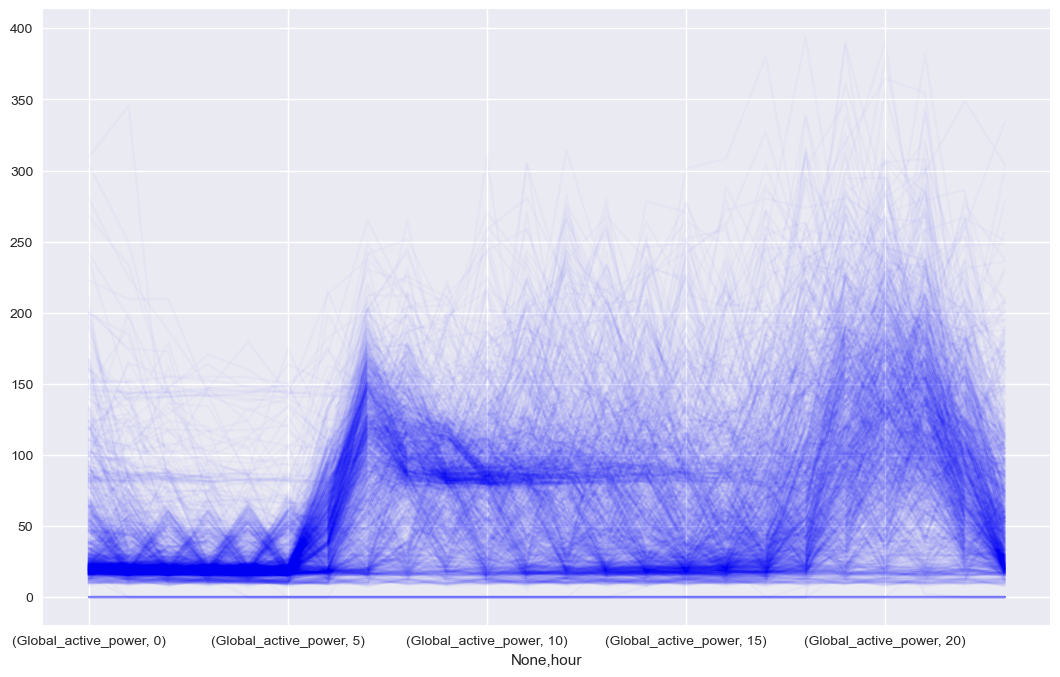

In [80]:
df_hourly_pivot.T.plot(figsize=[13,8],legend=False,color='blue',alpha=0.02)
plt.savefig('hourly_energy_distribution_blue.png')
plt.show()


In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

sillhouette_scores = []
n_cluster_list = np.arange(2,31).astype(int)

X = df_hourly_pivot.values.copy()


scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [84]:
for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters = n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhouette_scores.append(silhouette_score(X, kmeans.labels_))

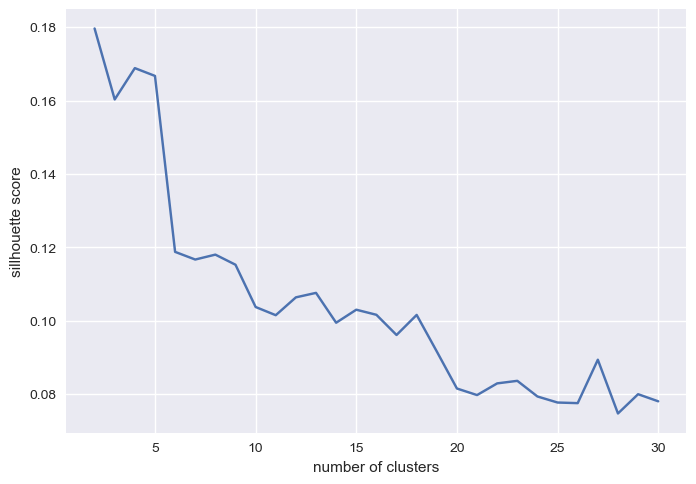

In [89]:
plt.plot(n_cluster_list,sillhouette_scores)
plt.xlabel('number of clusters')
plt.ylabel('sillhouette score')
plt.show()